<a href="https://colab.research.google.com/github/Tony-labs/project-1-deep-learning-image-classification-with-cnn/blob/main/proyecto_2_week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

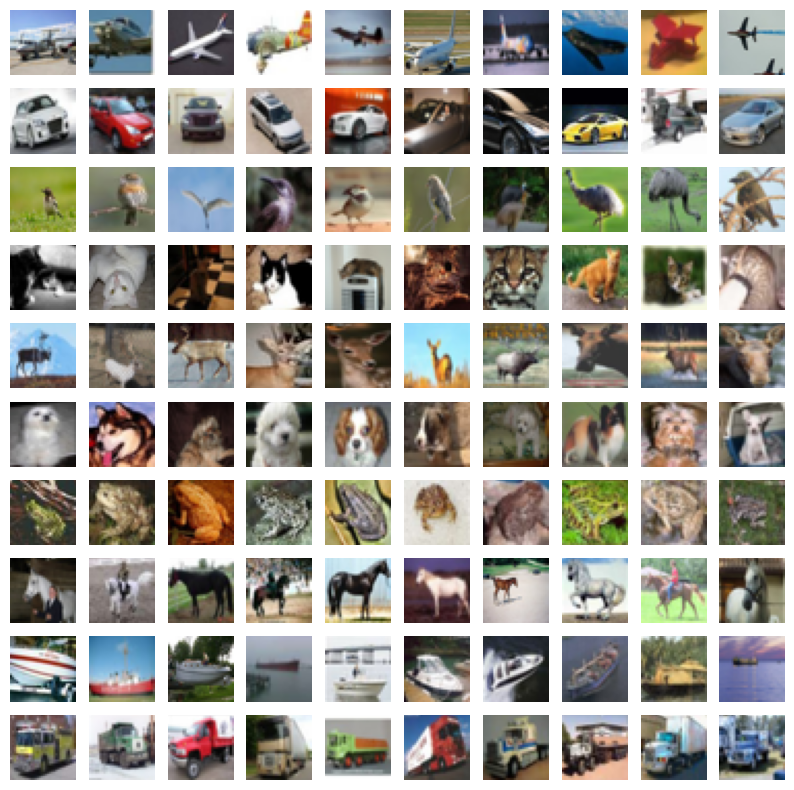

In [3]:
'''import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import pickle

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(x_train[np.random.choice(np.where(y_train == i)[0])])
        axes[i,j].axis('off')
plt.show()

'''

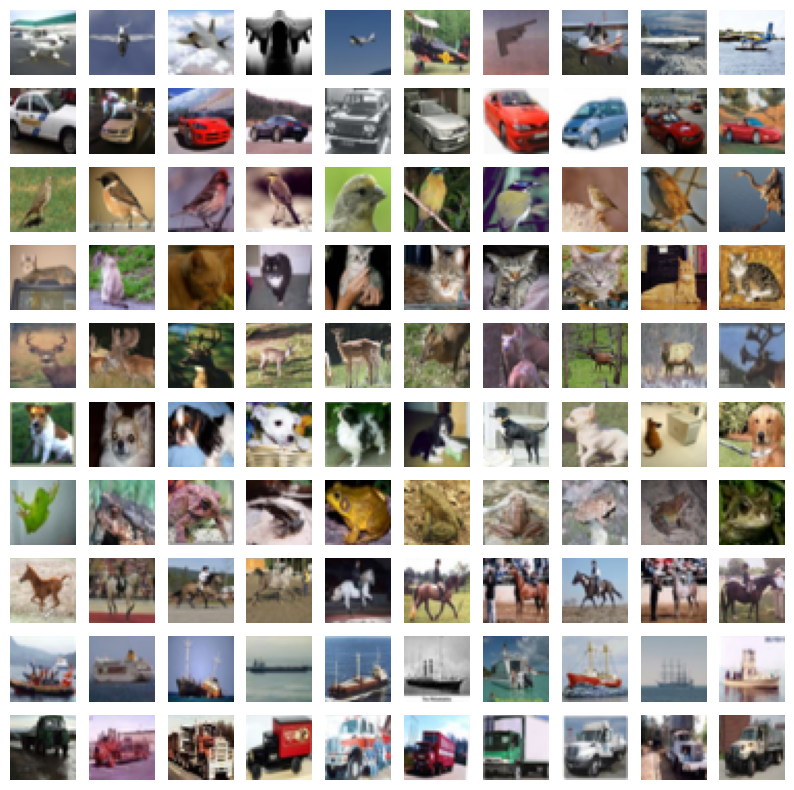

In [4]:
# prompt: add classes

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
import pickle

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define classes for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axes[i,j].imshow(x_train[np.random.choice(np.where(y_train == i)[0])])
        axes[i,j].axis('off')
        if j == 0:
            axes[i,j].set_ylabel(class_names[i], rotation=0, size='large', labelpad=40) # Add class labels
plt.show()

use trasnfer learning to make the prediction

In [5]:
from tensorflow.keras.applications import VGG16

In [6]:
# prompt: how do i use from tensorflow.keras.applications import VGG16 to predict the result of the module for convolutional neural network?

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Load pre-trained VGG16 model (excluding the top classification layer)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(256, activation='relu')(x)
predictions = keras.layers.Dense(10, activation='softmax')(x)  # Output layer with 10 classes

# Create the final model
model = keras.models.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test)) # Reduced epochs for demonstration

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Make predictions
predictions = model.predict(x_test)

# Example: Print the predicted class for the first test image
predicted_class = np.argmax(predictions[0])
print(f'Predicted class for the first image: {predicted_class}')

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4722 - loss: 1.5062 - val_accuracy: 0.5592 - val_loss: 1.2620
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5883 - loss: 1.1815 - val_accuracy: 0.5824 - val_loss: 1.2074
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6138 - loss: 1.1057 - val_accuracy: 0.5838 - val_loss: 1.1809
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6358 - loss: 1.0405 - val_accuracy: 0.6031 - val_loss: 1.1331
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6456 - loss: 1.0161 - val_accuracy: 0.6090 - val_loss: 1.1144
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6589 - loss: 0.9689 - val_accuracy: 0.6158 - val_loss: 1.1039
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6687 - loss: 0.9325 - val_accuracy: 0.6132 - val_loss: 1.1089
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.6854 - loss: 

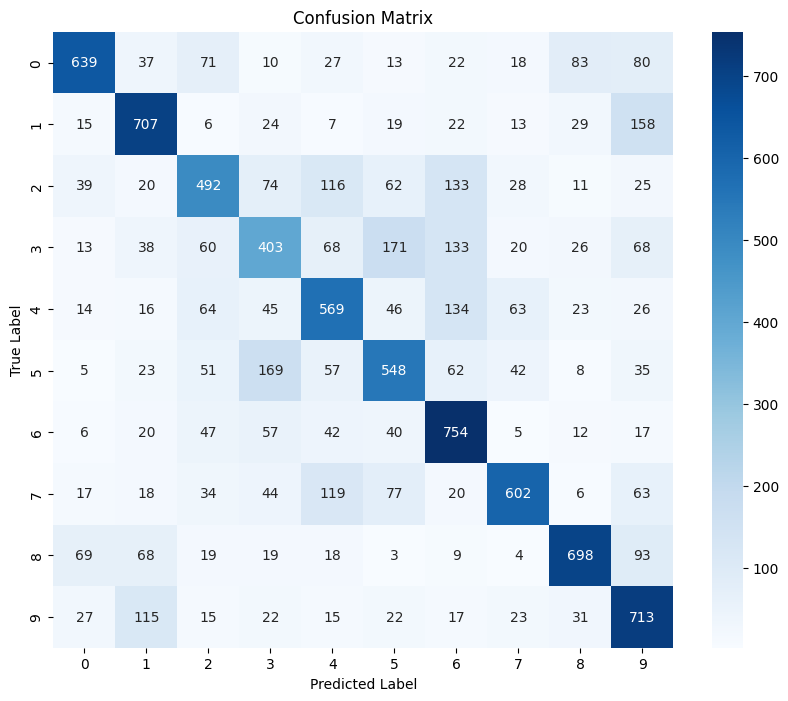

Class 0 is often confused with class 2 (71 times)
Class 0 is often confused with class 8 (83 times)
Class 0 is often confused with class 9 (80 times)
Class 1 is often confused with class 9 (158 times)
Class 2 is often confused with class 3 (74 times)
Class 2 is often confused with class 4 (116 times)
Class 2 is often confused with class 5 (62 times)
Class 2 is often confused with class 6 (133 times)
Class 3 is often confused with class 2 (60 times)
Class 3 is often confused with class 4 (68 times)
Class 3 is often confused with class 5 (171 times)
Class 3 is often confused with class 6 (133 times)
Class 3 is often confused with class 9 (68 times)
Class 4 is often confused with class 2 (64 times)
Class 4 is often confused with class 6 (134 times)
Class 4 is often confused with class 7 (63 times)
Class 5 is often confused with class 2 (51 times)
Class 5 is often confused with class 3 (169 times)
Class 5 is often confused with class 4 (57 times)
Class 5 is often confused with class 6 (62 

In [7]:
# prompt: Plot the confusion matrix for the new model and comment on the class confusions.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming 'predictions' holds the predicted probabilities
predicted_classes = np.class_name(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Analyze the confusion matrix (example)
# Find the most confused classes
# Iterate over the confusion matrix and identify high off-diagonal values
# For example:
for i in range(10):
    for j in range(10):
        if i != j and cm[i, j] > 50: # adjust the threshold as needed
            print(f"Class {i} is often confused with class {j} ({cm[i, j]} times)")

In [ ]:
model.save('transferlearning.keras')

Define the following model

In [17]:
# prompt: Students will build a Convolutional Neural Network (CNN) model to classify images from a given dataset into predefined categories/classes.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
def create_model(input_shape, num_classes):
    model2 = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(num_classes, activation="softmax"),
        ]
    )
    return model

# Example usage
input_shape = (28, 28, 1)  # Example input shape (adjust for your dataset)
num_classes = 10        # Example number of classes (adjust for your dataset)
model2 = create_model(input_shape, num_classes)

# Compile the model
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Print model summary
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [1]:
# prompt: Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

NameError: name 'model2' is not defined

In [ ]:
'''from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))
'''

In [2]:


# Load and pre-process your dataset (replace with your actual data loading)
# ... (Data loading and preprocessing code) ...
# Example using MNIST dataset:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Train the model
model2.fit(x_train, y_train, epochs=10, batch_size=32, validation_split = 0.1)

# Evaluate the model
loss, accuracy = model2.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


NameError: name 'keras' is not defined

In [ ]:
# prompt: Plot the confusion matrix for the new model2 and comment on the class confusions.

# Make predictions
predictions2 = model2.predict(x_test)

# Get predicted classes
predicted_classes2 = np.argmax(predictions2, axis=1)
true_classes2 = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm2 = confusion_matrix(true_classes2, predicted_classes2)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for model2')
plt.show()

# Analyze the confusion matrix for model2
for i in range(10):
    for j in range(10):
        if i != j and cm2[i, j] > 20:  # Adjust the threshold as needed
            print(f"Class {i} is often confused with class {j} ({cm2[i, j]} times)")

In [ ]:
model2. save ('deeplearning.keras')

In [ ]:
#verify file name
loaded_model = keras.models.load_model('deeplearning.keras')

In [ ]:
# prompt: predict what class of the cifar 10 wil appear

# The provided code trains two models: one using transfer learning with VGG16 and another using a simple CNN.
# Both models are trained on image datasets, and the code then analyzes the confusion matrices of each to identify classes that are frequently misclassified.

# To predict the class of a CIFAR-10 image using the trained models, you would need to:
# 1. Load the saved models ('transferlearning.keras' and 'deeplearning.keras').
# 2. Preprocess the input image (resize and normalize) to match the model's input requirements.
# 3. Use model.predict() to get the predicted probabilities for each class.
# 4. Determine the class with the highest probability as the predicted class.

# Example prediction using the transfer learning model:

import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load the saved transfer learning model
loaded_model = keras.models.load_model('deeplearning.keras')

# Assuming 'new_image' is a preprocessed numpy array representing the input image
# Ensure the image is normalized to [0, 1], and the shape is correct.
# For CIFAR-10 images, the shape is (32, 32, 3)
# new_image = preprocess_image(your_image_path)  # Replace with your image preprocessing function

# Make a prediction
predictions = loaded_model.predict(np.expand_dims(new_image, axis=0)) # Add batch dimension
predicted_class = np.argmax(predictions[0])

print(f"Predicted class: {predicted_class}")

# Similarly, load and use the 'deeplearning.keras' model to predict the image class.
# Remember to preprocess the image accordingly for the second model.

# The code provided does not include a function to preprocess an image. You'll need to create one that:
# 1. Loads the image.
# 2. Resizes the image if necessary (to match the model's input shape).
# 3. Normalizes the pixel values (typically dividing by 255).
# 4. Returns the preprocessed image as a numpy array.



In [ ]:
# prompt: Include convolutional layers, pooling layers, and fully connected layers for model2

# Define the CNN model
def create_model(input_shape, num_classes):
    model2 = keras.Sequential([
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),  # Convolutional layer 1
        layers.MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer 1
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),  # Convolutional layer 2
        layers.MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer 2
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"), # Convolutional layer 3
        layers.MaxPooling2D(pool_size=(2, 2)), # Max pooling layer 3
        layers.Flatten(), # Flatten the output for the fully connected layers
        layers.Dense(128, activation="relu"),  # Fully connected layer 1
        layers.Dropout(0.5), # Dropout for regularization
        layers.Dense(num_classes, activation="softmax"), # Output layer
    ])
    return model2



In [ ]:
import numpy as np

# Assuming 'model2' is your defined model and input_shape is (28, 28, 1)
model2.build(input_shape=(None, 28, 28, 1)) # Build the model with the input shape

for layer in model2.layers:
    # Access output shape using layer.get_output_shape_at(0) or layer.output.shape if available
    try:
        output_shape = layer.get_output_shape_at(0) # For older Keras versions
    except AttributeError:
        output_shape = layer.output.shape # For newer versions

    print(layer.name, output_shape)


In [ ]:
# Train the model and store the training history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Now you can access the training history for plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Transfer Learning Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Transfer Learning Model Accuracy')
plt.show()

In [ ]:
# prompt: build an app using Flask

from flask import Flask, request, jsonify
import numpy as np
from tensorflow import keras
import tensorflow as tf
from PIL import Image
import io

app = Flask(__name__)

# Load your trained model
model = keras.models.load_model('transferlearning.keras')
model2 = keras.models.load_model('deeplearning.keras')


# Preprocess the image
def preprocess_image(image):
    image = image.resize((32, 32))  # Resize for VGG16
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image


def preprocess_image2(image):
    image = image.resize((28, 28))
    image = image.convert("L") # Convert to grayscale
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    return image

@app.route('/predict', methods=['POST'])
def predict():
    if 'image' not in request.files:
        return jsonify({'error': 'No image provided'}), 400

    image_file = request.files['image']
    try:
        image = Image.open(io.BytesIO(image_file.read()))
        # Preprocess the image for the first model
        processed_image = preprocess_image(image)
        prediction = model.predict(processed_image)
        predicted_class = np.argmax(prediction)

        # Preprocess the image for the second model
        processed_image2 = preprocess_image2(image)
        prediction2 = model2.predict(processed_image2)
        predicted_class2 = np.argmax(prediction2)

        response = {
          'transferlearning_prediction': int(predicted_class),
          'deeplearning_prediction': int(predicted_class2)
        }

        return jsonify(response), 200

    except Exception as e:
        return jsonify({'error': str(e)}), 500


if __name__ == '__main__':
    app.run(debug=True)
    ##parameters for this function.